In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import nonint, find_fixpoint
from quant_met.configuration import Configuration
from quant_met import plotting

In [3]:
lattice_constant = np.sqrt(3)

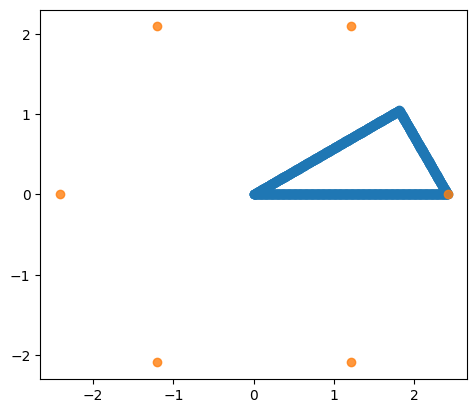

In [4]:
whole_path, whole_path_plot, ticks, labels = plotting.generate_bz_path(lattice_constant)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

BZ_path_plot = plotting.plot_into_bz(all_K_points, whole_path)

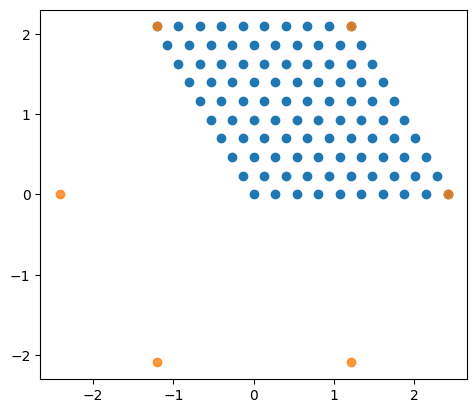

In [5]:
BZ_grid = find_fixpoint.generate_k_space_grid(10, 10, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

Time taken to solve the gap equation: 121.82 seconds


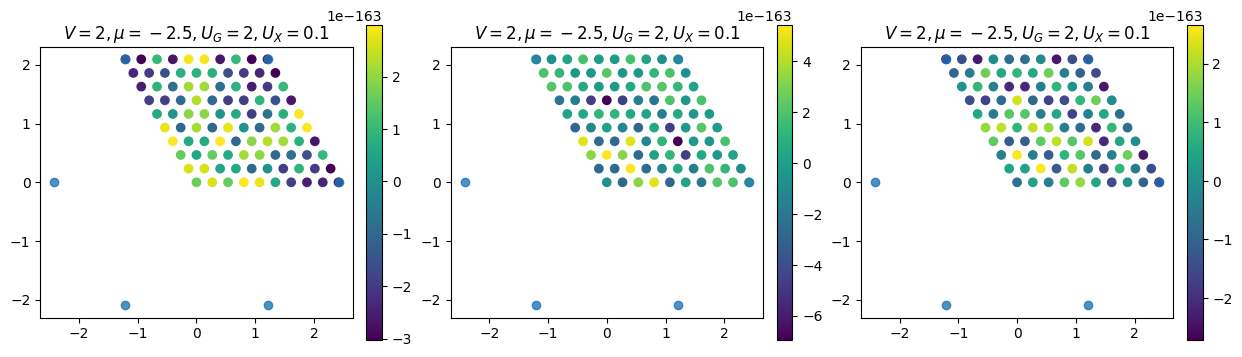

In [6]:
import time

config = Configuration(t_gr=1, t_x=0.01, a=lattice_constant, U_Gr=2, U_X=0.1, V=2, mu=-2.5, beta=10000)

start = time.time()
delta = find_fixpoint.solve_gap_equation(config, BZ_grid)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
delta_interpolated = find_fixpoint.interpolate_gap(delta, whole_path)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(3*5, 5))

for delta, ax in zip(delta.data[['delta_1', 'delta_2', 'delta_3']].to_numpy().T, axs):
    ax.set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

Text(0.5, 1.0, '$V = 2, \\mu = -2.5$')

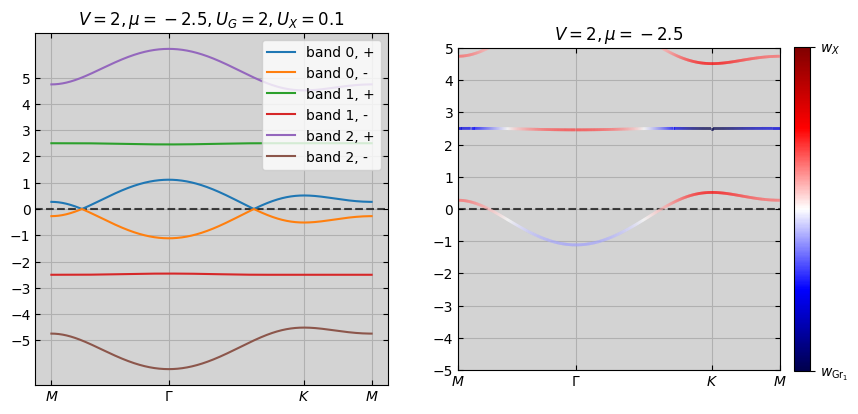

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

energies_on_bandpath, _ = nonint.generate_bloch(whole_path, config)

plotting.plot_bcs_bandstructure(energies_on_bandpath.T, delta_interpolated.data[['delta_1', 'delta_2', 'delta_3']].to_numpy().T, whole_path_plot, ticks, labels, fig, axs[0])
axs[0].set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")

band_structure = nonint.calculate_bandstructure(config, whole_path)
bands = band_structure[['band_1', 'band_2', 'band_3']].to_numpy().T
overlaps = band_structure[['wx_1', 'wx_2', 'wx_3']].to_numpy().T
plotting.plot_nonint_bandstructure(bands, overlaps, whole_path_plot, ticks, labels, fig, axs[1])
axs[1].set_title(f"$V = {config.V}, \\mu = {config.mu}$")

In [8]:
delta_over_U = []

U_range = np.linspace(start=0, stop=20, num=20)

for U in U_range:
    config = Configuration(t_gr=1, t_x=0.01, a=lattice_constant, U_Gr=U, U_X=0, V=2, mu=-0.5, beta=10000)

    start = time.time()
    delta = find_fixpoint.solve_gap_equation(config, BZ_grid)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    delta_over_U.append(delta.data.loc[0, 'delta_1'])

Time taken to solve the gap equation: 1.54 seconds
Time taken to solve the gap equation: 109.24 seconds
Time taken to solve the gap equation: 152.58 seconds
Time taken to solve the gap equation: 244.22 seconds


RuntimeError: Failed to converge after 500 iterations, value is [-1.59402285e-51 -1.56982259e-51 -1.49383583e-51 -1.35562367e-51
 -1.13756008e-51 -8.18068162e-52 -3.87057709e-52  1.13357558e-52
  5.39581274e-52  7.01733619e-52 -1.56982259e-51 -1.56982259e-51
 -1.51974671e-51 -1.41279142e-51 -1.23514501e-51 -9.67485052e-52
 -5.94207580e-52 -1.32353868e-52  3.18504859e-52  5.76280459e-52
 -1.49383583e-51 -1.51974671e-51 -1.49383583e-51 -1.41279142e-51
  1.93190992e-48 -1.04076474e-51 -7.21880034e-52 -3.21904988e-52
  8.09012861e-53  3.31155654e-52 -1.35562367e-51 -1.41279142e-51
 -1.41279142e-51 -1.35562367e-51 -1.23514501e-51 -1.04076474e-51
 -7.64408626e-52 -4.20489994e-52 -8.09827575e-53  1.17975454e-52
 -1.13756008e-51 -1.23514501e-51  1.93190992e-48 -1.23514501e-51
 -1.13756008e-51 -9.67485052e-52 -7.21880034e-52 -4.20489994e-52
 -1.36841513e-52  2.40522645e-54 -8.18068162e-52 -9.67485052e-52
 -1.04076474e-51 -1.04076474e-51 -9.67485052e-52 -8.18068162e-52
 -5.94207580e-52 -3.21904988e-52 -8.09827575e-53  2.40522645e-54
 -3.87057709e-52 -5.94207580e-52 -7.21880034e-52 -7.64408626e-52
 -7.21880034e-52 -5.94207580e-52 -3.87057709e-52 -1.32353868e-52
  8.09012861e-53  1.17975454e-52  1.13357558e-52 -1.32353868e-52
 -3.21904988e-52 -4.20489994e-52 -4.20489994e-52 -3.21904988e-52
 -1.32353868e-52  1.13357558e-52  3.18504859e-52  3.31155654e-52
  5.39581274e-52  3.18504859e-52  8.09012861e-53 -8.09827575e-53
 -1.36841513e-52 -8.09827575e-53  8.09012861e-53  3.18504859e-52
  5.39581274e-52  5.76280459e-52  7.01733619e-52  5.76280459e-52
  3.31155654e-52  1.17975454e-52  2.40522645e-54  2.40522645e-54
  1.17975454e-52  3.31155654e-52  5.76280459e-52  7.01733619e-52
 -1.87081117e-51 -1.91806767e-51 -2.06636515e-51 -2.33562229e-51
 -2.75850503e-51 -3.37168489e-51 -4.18145090e-51 -5.08597945e-51
 -5.81466667e-51 -6.07900906e-51 -1.91806767e-51 -1.91806767e-51
 -2.01581336e-51 -2.22434186e-51 -2.56961312e-51 -3.08603763e-51
 -3.79519902e-51 -4.64746626e-51 -5.44230736e-51 -5.87518212e-51
 -2.06636515e-51 -2.01581336e-51 -2.06636515e-51 -2.22434186e-51
 -2.50827807e-51 -2.94519993e-51 -3.55436527e-51 -4.30165540e-51
 -5.02874856e-51 -5.46395696e-51 -2.33562229e-51 -2.22434186e-51
 -2.22434186e-51 -2.33562229e-51 -2.56961312e-51 -2.94519993e-51
 -3.47371946e-51 -4.11952129e-51 -4.74010896e-51 -5.09410414e-51
 -2.75850503e-51 -2.56961312e-51 -2.50827807e-51 -2.56961312e-51
 -2.75850503e-51 -3.08603763e-51 -3.55436527e-51 -4.11952129e-51
 -4.63935046e-51 -4.88943582e-51 -3.37168489e-51 -3.08603763e-51
 -2.94519993e-51 -2.94519993e-51 -3.08603763e-51 -3.37168489e-51
 -3.79519902e-51 -4.30165540e-51 -4.74010896e-51 -4.88943582e-51
 -4.18145090e-51 -3.79519902e-51 -3.55436527e-51 -3.47371946e-51
 -3.55436527e-51 -3.79519902e-51 -4.18145090e-51 -4.64746626e-51
 -5.02874856e-51 -5.09410414e-51 -5.08597945e-51 -4.64746626e-51
 -4.30165540e-51 -4.11952129e-51 -4.11952129e-51 -4.30165540e-51
 -4.64746626e-51 -5.08597945e-51 -5.44230736e-51 -5.46395696e-51
 -5.81466667e-51 -5.44230736e-51 -5.02874856e-51 -4.74010896e-51
 -4.63935046e-51 -4.74010896e-51 -5.02874856e-51 -5.44230736e-51
 -5.81466667e-51 -5.87518212e-51 -6.07900906e-51 -5.87518212e-51
 -5.46395696e-51 -5.09410414e-51 -4.88943582e-51 -4.88943582e-51
 -5.09410414e-51 -5.46395696e-51 -5.87518212e-51 -6.07900906e-51
 -1.62473719e-51 -1.59964420e-51 -1.52077296e-51 -1.37711855e-51
 -1.15045054e-51 -8.19689745e-52 -3.78783262e-52  1.21874764e-52
  5.36614472e-52  6.91286264e-52 -1.59964420e-51 -1.59964420e-51
 -1.54767955e-51 -1.43655628e-51 -1.25184834e-51 -9.74077907e-52
 -5.89745064e-52 -1.22242914e-52  3.22932206e-52  5.71775755e-52
 -1.52077296e-51 -1.54767955e-51 -1.52077296e-51 -1.43655628e-51
 -1.28472171e-51 -1.05000244e-51 -7.20664194e-52 -3.12844866e-52
  8.98304372e-53  3.35244897e-52 -1.37711855e-51 -1.43655628e-51
 -1.43655628e-51 -1.37711855e-51 -1.25184834e-51 -1.05000244e-51
 -7.64408626e-52 -4.12698527e-52 -7.09199701e-53  1.26428928e-52
 -1.15045054e-51 -1.25184834e-51 -1.28472171e-51 -1.25184834e-51
 -1.15045054e-51 -9.74077907e-52 -7.20664194e-52 -4.12698527e-52
 -1.26733283e-52  1.20733165e-53 -8.19689745e-52 -9.74077907e-52
 -1.05000244e-51 -1.05000244e-51 -9.74077907e-52 -8.19689745e-52
 -5.89745064e-52 -3.12844866e-52 -7.09199701e-53  1.20733165e-53
 -3.78783262e-52 -5.89745064e-52 -7.20664194e-52 -7.64408626e-52
 -7.20664194e-52 -5.89745064e-52 -3.78783262e-52 -1.22242914e-52
  8.98304372e-53  1.26428928e-52  1.21874764e-52 -1.22242914e-52
 -3.12844866e-52 -4.12698527e-52 -4.12698527e-52 -3.12844866e-52
 -1.22242914e-52  1.21874764e-52  3.22932206e-52  3.35244897e-52
  5.36614472e-52  3.22932206e-52  8.98304372e-53 -7.09199701e-53
 -1.26733283e-52 -7.09199701e-53  8.98304372e-53  3.22932206e-52
  5.36614472e-52  5.71775755e-52  6.91286264e-52  5.71775755e-52
  3.35244897e-52  1.26428928e-52  1.20733165e-53  1.20733165e-53
  1.26428928e-52  3.35244897e-52  5.71775755e-52  6.91286264e-52]

In [ ]:
plt.plot(U_range, np.abs(delta_over_U), 'x--')
plt.ylim(bottom=0)
plt.xlim(left=0, right=20)
plt.ylabel("Gap/t")
plt.xlabel("U/t")